#Defining Problem Statement and Analyzing basic metrics

# Problem Statement

  - The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand:
  
    - Does the spending habits differ between male and female customers : Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, norm

In [2]:
df = pd.read_csv("/content/drive/MyDrive/01. Data Set for Colab Notebooks/walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
# Column wise - count of unique values
for i in df.columns:
  print(f"{i} :" , df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


## Insight on Data:
  * We have 10 columns and 550068 rows in the data set
  * Numerical Data : Purchase
  * Categorical Data : User ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, and Product category

In [7]:
##################################################################################################################################################################################################################

In [8]:
##################################################################################################################################################################################################################

# Missing Value & Outlier Detection

In [9]:
#Counting Missing Values for each column
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


 - No missing value / null value in the data set

<Axes: xlabel='City_Category', ylabel='Purchase'>

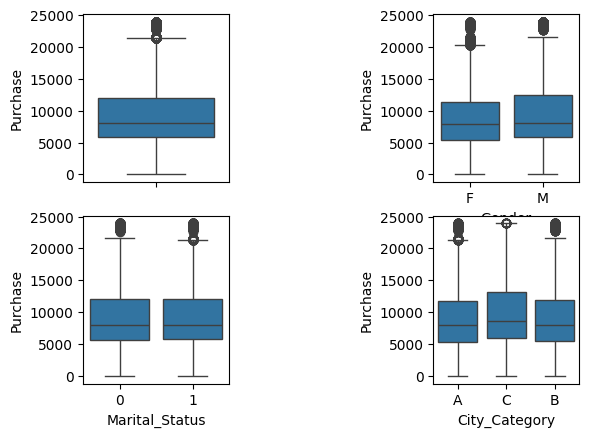

In [10]:
#Detecting Outliers - Using Box Plot
plt.figure()

plt.subplot(2,3,1)
sns.boxplot(data = df, y = 'Purchase')

plt.subplot(2,3,3)
sns.boxplot(data = df, y = 'Purchase', x = 'Gender')

plt.subplot(2,3,4)
sns.boxplot(data = df, y = 'Purchase', x = 'Marital_Status')

plt.subplot(2,3,6)
sns.boxplot(data = df, y = 'Purchase', x = 'City_Category')



In [11]:
#Detecting Outliers - Using Z-Score
mu = df['Purchase'].mean()
sigma = df['Purchase'].std()
df['z_score'] = (df['Purchase'] - mu)/sigma
df.head()

lower_threshold = mu - 3*sigma
upper_threshold = mu + 3*sigma
print(f"Lower Threshold : {lower_threshold}")
print(f"Upper Threshold : {upper_threshold}")

Lower Threshold : -5805.227468502755
Upper Threshold : 24333.164894421006


# Summary : Insights from Missing Value and Outlier Perspective

- No missing value / null value in the data set
- Any purchase above $24333.16 is an Outlier

In [12]:
##################################################################################################################################################################################################################

In [13]:
##################################################################################################################################################################################################################

# Business Insights based on Non - Graphical and Visual Analysis
  * Comments on the range of attributes
  * Comments on the distribution of the variables and relationship between them
  * Comments for each univariate and bivariate plot


Text(0.5, 1.0, 'Count of Purchases by Gender')

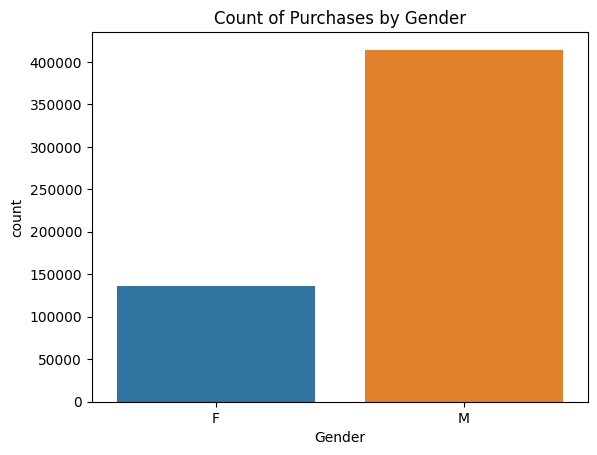

In [14]:
#Count purchases by Gender - Countplot

plt.figure()
sns.countplot(data = df, x = 'Gender', hue = 'Gender')
plt.title('Count of Purchases by Gender')

In [15]:
df['Gender'].value_counts(normalize = True)

,proportion
Gender,
M,0.753105
F,0.246895


 - Count of purchase by male (Count : 414259) is much higher than count of purchases made by female (Count : 135809) i.e. 75.31% are transactions are made by male and 24.69% transactions made by female

  Gender    Purchase
0      F  1186232642
1      M  3909580100
  Gender     Purchase
0      F  8734.565765
1      M  9437.526040
  Gender  Purchase
0      F    7914.0
1      M    8098.0


Text(0.5, 1.0, 'Median Purchase by Gender')

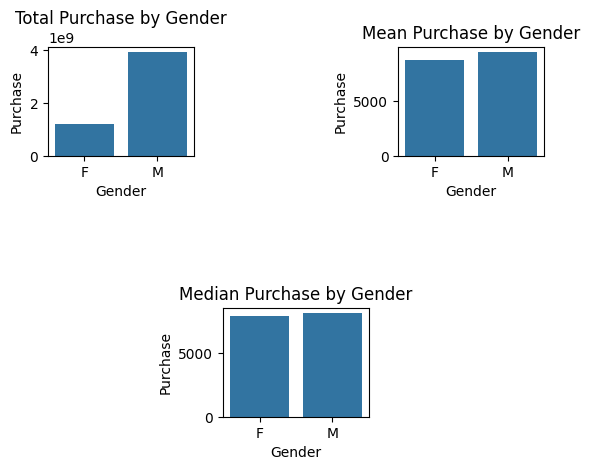

In [16]:
# Calculate total purchase by gender
plt.figure()

plt.subplot(3,3,1)
gender_total_purchase = df.groupby('Gender')['Purchase'].sum().reset_index()
print(gender_total_purchase)
sns.barplot(data = gender_total_purchase, y = 'Purchase',x = 'Gender')
plt.title('Total Purchase by Gender')

plt.subplot(3,3,3)
gender_total_purchase = df.groupby('Gender')['Purchase'].mean().reset_index()
print(gender_total_purchase)
sns.barplot(data = gender_total_purchase, y = 'Purchase',x = 'Gender')
plt.title('Mean Purchase by Gender')

plt.subplot(3,3,8)
gender_total_purchase = df.groupby('Gender')['Purchase'].median().reset_index()
print(gender_total_purchase)
sns.barplot(data = gender_total_purchase, y = 'Purchase',x = 'Gender')
plt.title('Median Purchase by Gender')

 - Total purchases by male (Total : USD 3909580100) is much higher than total purchase made by female (USD 1186232642). Similar ratio as transaction count persists from Total Purchase perspective

 - Mean Purchase amount for Male is  9437.53 and for Female it's 8734.57. Mean is impacted by Outliers.

 - Median pruchase amount for male is 8098 and for female it's 7914. Here the purchase differnce shrinks as Males have more / higher value outliers than Female buyers.

 - Males have higher Total, Mean and Meadian purchases with respect to Females


   Marital_Status Gender     Purchase
0               0      F  8679.845815
1               0      M  9453.756740
2               1      F  8810.249789
3               1      M  9413.817605
   Marital_Status Gender  Purchase
0               0      F    7895.0
1               0      M    8101.0
2               1      F    7939.0
3               1      M    8094.0


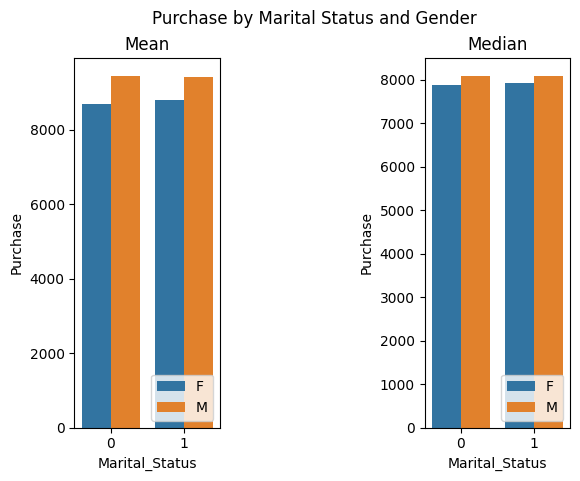

In [17]:
plt.figure()
plt.suptitle('Purchase by Marital Status and Gender')

plt.subplot(1,3,1)
# Calculate mean purchase by marital status and gender
marital_gender_total_purchase = df.groupby(['Marital_Status', 'Gender'])['Purchase'].mean().reset_index()
print(marital_gender_total_purchase)
sns.barplot(data = marital_gender_total_purchase, y = 'Purchase',x = 'Marital_Status',hue='Gender')
plt.title("Mean")
plt.legend(loc='lower right')

plt.subplot(1,3,3)
# Calculate mean purchase by marital status and gender
marital_gender_total_purchase = df.groupby(['Marital_Status', 'Gender'])['Purchase'].median().reset_index()
print(marital_gender_total_purchase)
sns.barplot(data = marital_gender_total_purchase, y = 'Purchase',x = 'Marital_Status',hue='Gender')
plt.title('Median')
plt.legend(loc='lower right')

- Regardless of Marital_Status, Mean and Median purchase amount per transaction for Male is higher than that of female

  Gender City_Category     Purchase
0      F             A  8579.708576
1      F             B  8540.677694
2      F             C  9130.107518
3      M             A  9017.834470
4      M             B  9354.854433
5      M             C  9913.567248
  Gender City_Category     Purchase
0      F             A  8579.708576
1      F             B  8540.677694
2      F             C  9130.107518
3      M             A  9017.834470
4      M             B  9354.854433
5      M             C  9913.567248


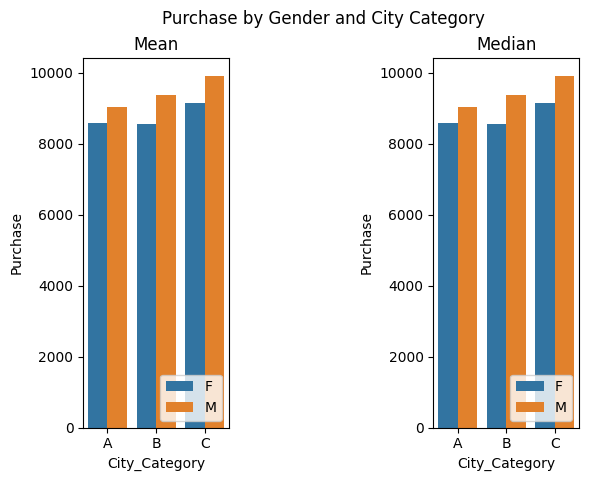

In [18]:
plt.figure()
plt.suptitle('Purchase by Gender and City Category')

plt.subplot(1,3,1)
# Calculate mean purchase by gender and city category
gender_city_total_purchase = df.groupby(['Gender', 'City_Category'])['Purchase'].mean().reset_index()
print(gender_city_total_purchase)
sns.barplot(data = gender_city_total_purchase, y = 'Purchase',x = 'City_Category', hue='Gender')
plt.title('Mean')
plt.legend(loc='lower right')

plt.subplot(1,3,3)
# Calculate mean purchase by gender and city category
gender_city_total_purchase = df.groupby(['Gender', 'City_Category'])['Purchase'].mean().reset_index()
print(gender_city_total_purchase)
sns.barplot(data = gender_city_total_purchase, y = 'Purchase',x = 'City_Category', hue='Gender')
plt.title('Median')
plt.legend(loc='lower right')

 - Regardless of City_Category, Mean and Median purchase amount per transaction for Male is higher than that of female

In [19]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
# Replacing categorical values with number to apply correlation
df1 = df.copy()
df1['Gender'] = df1['Gender'].replace(['F','M'],[0,1])
df1['Marital_Status'] = df1['Marital_Status'].replace(['No','Yes'],[0,1])
df1['City_Category'] = df1['City_Category'].replace(['A','B','C'],[0,1,2])
df1['Age'] = df1['Age'].replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[1,2,3,4,5,6,7])
df1.head()

/tmp/ipython-input-2939058120.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'] = df1['Gender'].replace(['F','M'],[0,1])
/tmp/ipython-input-2939058120.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['City_Category'] = df1['City_Category'].replace(['A','B','C'],[0,1,2])
/tmp/ipython-input-2939058120.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futur

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,z_score
0,1000001,P00069042,0,1,10,0,2,0,3,8370,-0.177973
1,1000001,P00248942,0,1,10,0,2,0,1,15200,1.181755
2,1000001,P00087842,0,1,10,0,2,0,12,1422,-1.561192
3,1000001,P00085442,0,1,10,0,2,0,12,1057,-1.633857
4,1000002,P00285442,1,7,16,2,4+,0,8,7969,-0.257804


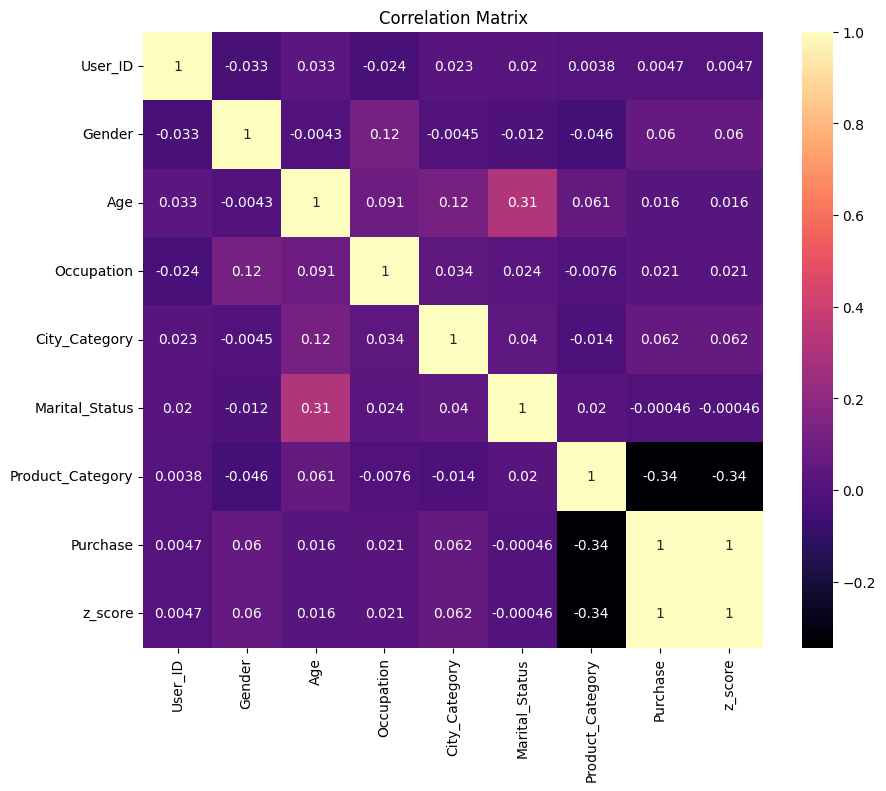

In [21]:
plt.figure(figsize = (10,8))
sns.heatmap(df1.corr(numeric_only=True),  annot = True, cmap = 'magma' )
plt.title("Correlation Matrix")
plt.show()

- Only Product_Category has a moderate negative correlation (-0.34) with Purchase amount

# Insights on Non- Graphical and Visual Analysis

  - Count of purchase by male (Count : 414259) is much higher than count of purchases made by female (Count : 135809) i.e. 75.31% are transactions are made by male and 24.69% transactions made by female

  - Total purchases by male (Total : USD 3909580100) is much higher than total purchase made by female (USD 1186232642). Similar ratio as transaction count persists from Total Purchase perspective

  - Mean Purchase amount for Male is  9437.53 and for Female it's 8734.57. Mean is impacted by Outliers.

  - Median pruchase amount for male is 8098 and for female it's 7914. Here the purchase differnce shrinks as Males have more / higher value outliers than Female buyers.

  - Males have higher Total, Mean and Meadian purchases with respect to Females

  - Regardless of Marital_Status, Mean and Median purchase amount per transaction for Male is higher than that of female

  - Regardless of City_Category, Mean and Median purchase amount per transaction for Male is higher than that of female

  - Only Product_Category has a moderate negative correlation (-0.34) with Purchase amount

In [22]:
##################################################################################################################################################################################################################

In [23]:
##################################################################################################################################################################################################################

# Business Problem

  - Does the spending habits differ between male and female customers : Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).




###1 : Are women spending more money per transaction than men? Why or Why not?

In [24]:
female_purchase = df[df['Gender'] == 'F']['Purchase']
male_purchase = df[df['Gender'] == 'M']['Purchase']

print(f"Female Purchase Mean : {round(female_purchase.mean(),2)}")
print(f"Female Purchase SD : {round(female_purchase.std(),5)}")

print(f"Male Purchase Mean : {round(male_purchase.mean(),2)}")
print(f"Male Purchase SD : {round(male_purchase.std(),5)}")

Female Purchase Mean : 8734.57
Female Purchase SD : 4767.23329
Male Purchase Mean : 9437.53
Male Purchase SD : 5092.18621


- Apparently it looks like Women are spending less than Men per transaction. But it can be due to Outliers as well.

- We need to perform statistical test to validate this

In [25]:
# Ho : Average purchase by female <= Average purchase by male
# Ha : Average purchase by female > Average purchase by male
# Confidence Level = 95%
# Significance Level = 5% (alpha)

t_stat, p_value = ttest_ind(female_purchase, male_purchase,alternative = 'greater')
print(f"t-statistic : {t_stat}")
print(f"p-value : {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


t-statistic : -44.837957934353966
p-value : 1.0
Fail to reject the null hypothesis


- p_value > alpha
- There is no significant evidence of "average purchase by Female per transaction is greater than that of male"
- So, we can conclude, average purchase by male per transaction is greater than that of female

###2 : Confidence intervals and distribution of the mean of the expenses by female and male customers

In [26]:
x1 = np.array(female_purchase)
x2 = np.array(male_purchase)

# Sample sizes
n1 = len(x1)
n2 = len(x2)

# Sample means
mean1 = x1.mean()
mean2 = x2.mean()

# Sample standard deviations (as estimates of population std)
std1 = x1.std(ddof=1)
std2 = x2.std(ddof=1)

# Standard error
se = np.sqrt((std1**2)/n1 + (std2**2)/n2)

# Z critical value for 95% confidence
z_crit = norm.ppf(0.975)  # two-tailed 95%

# Confidence interval
diff = mean1 - mean2
ci_low = diff - z_crit * se
ci_upp = diff + z_crit * se

print(f"95% Confidence Interval (Z-Test): ({ci_low:.3f}, {ci_upp:.3f})")

95% Confidence Interval (Z-Test): (-732.680, -673.240)


- At 95% confidence level, Confidence interval = [-732.680, -673.240]
- As per CLT, the Smaple Ditribution follows Gaussian regardless of the population as the sample size for both the samples are much bigger than 30

###3 : Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [27]:
print(f"Female Purchase Mean : {round(female_purchase.mean(),2)}")
print(f"Female Purchase SD : {round(female_purchase.std(),5)}")

print(f"Male Purchase Mean : {round(male_purchase.mean(),2)}")
print(f"Male Purchase SD : {round(male_purchase.std(),5)}")

Female Purchase Mean : 8734.57
Female Purchase SD : 4767.23329
Male Purchase Mean : 9437.53
Male Purchase SD : 5092.18621


In [28]:
CI_Upper_F = female_purchase.mean() + norm.ppf(0.975) * (female_purchase.std() / np.sqrt(len(female_purchase)))
CI_Lower_F = female_purchase.mean() - norm.ppf(0.975) * (female_purchase.std() / np.sqrt(len(female_purchase)))

print(f"Female Confidence Interval : ({CI_Lower_F}, {CI_Upper_F})")

CI_Upper_M = male_purchase.mean() + norm.ppf(0.975) * (male_purchase.std() / np.sqrt(len(male_purchase)))
CI_Lower_M = male_purchase.mean() - norm.ppf(0.975) * (male_purchase.std() / np.sqrt(len(male_purchase)))

print(f"Male Confidence Interval : ({CI_Lower_M}, {CI_Upper_M})")

Female Confidence Interval : (8709.21154714068, 8759.919983170272)
Male Confidence Interval : (9422.01944736257, 9453.032633581959)


- The confidence intervals of average male and female spendings are not overlapping
- That means, there is a statistically significant difference between the average spending of male and female customers — and specifically, males spend more on average than females







###4 : Results when the same activity is performed for Married vs Unmarried

In [29]:
ms0 = df[df['Marital_Status'] == 0]['Purchase']
ms1 = df[df['Marital_Status'] == 1]['Purchase']

ms0_mean = ms0.mean()
ms0_std = ms0.std()

ms1_mean = ms1.mean()
ms1_std = ms1.std()

print(f"Marital Status 0 (Unmarried) Purchase Mean : {round(ms0_mean,2)}")
print(f"Marital Status 1 (Married) Purchase Mean : {round(ms1_mean,2)}")
#print(f"Marital Status 0 (Unmarried) Purchase SD : {round(ms0_std,5)}")
#print(f"Marital Status 1 (Married) Purchase SD : {round(ms1_std,5)}")



Marital Status 0 (Unmarried) Purchase Mean : 9265.91
Marital Status 1 (Married) Purchase Mean : 9261.17


 - Mean purchase for unmarried and married buyers are very close and apparently looks like there is no significant difference in mean
 - To confirm the observation we'll perform a 2-sample Test

In [30]:
# Ho : mean purchase by married = mean purchase by unmarried
# Ha : mean purchase by married != mean purchase by unmarried
# Confidence Level = 95%
# Significance Level = 5% (alpha)

t_stat, p_value = ttest_ind(ms0, ms1,alternative = 'two-sided')
print(f"t-statistic : {t_stat}")
print(f"p-value : {p_value}")

t-statistic : 0.3436698055440526
p-value : 0.7310947525758316


- p_value > alpha
- We fail to reject Ho
- There is no significant evidence to conclude mean purchase by married and unmarried buyers are different.

###5 : Results when the same activity is performed for Age

In [31]:
age1 = df1[df1['Age'] == 1]['Purchase']
age2 = df1[df1['Age'] == 2]['Purchase']
age3 = df1[df1['Age'] == 3]['Purchase']
age4 = df1[df1['Age'] == 4]['Purchase']
age5 = df1[df1['Age'] == 5]['Purchase']
age6 = df1[df1['Age'] == 6]['Purchase']
age7 = df1[df1['Age'] == 7]['Purchase']

   Age     Purchase
0    1  8933.464640
1    2  9169.663606
2    3  9252.690633
3    4  9331.350695
4    5  9208.625697
5    6  9534.808031
6    7  9336.280459


/tmp/ipython-input-400149060.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


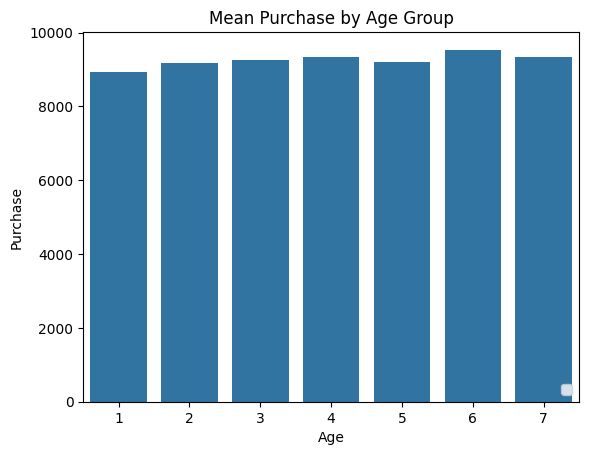

In [32]:
plt.figure()
# Calculate mean purchase by age
age_total_purchase = df1.groupby(['Age'])['Purchase'].mean().reset_index()
print(age_total_purchase)
sns.barplot(data = age_total_purchase, y = 'Purchase',x = 'Age')
plt.title("Mean Purchase by Age Group")
plt.legend(loc='lower right')

In [33]:
# Ho : There is no significant difference in Mean Purchase of each age group
# Ha : At least one age group has significantly different Mean Purchase
#Confidence Level : 95%

from scipy.stats import f_oneway

f_stat, p_value = f_oneway(age1, age2, age3, age4, age5, age6, age7)
print(f"f-statistic : {f_stat}")
print(f"p-value : {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis")
    print("At least one age group has significantly different Mean Purchase")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in Mean Purchase of each age group")

f-statistic : 40.57579909450407
p-value : 1.053563939251671e-49
Reject the null hypothesis
At least one age group has significantly different Mean Purchase


- p-value < alpha
- We reject Ho
- At least one age group has significantly different Mean Purchase

In [34]:
##################################################################################################################################################################################################################

In [35]:
##################################################################################################################################################################################################################

# Final Insights - insights based on exploration and CLT
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plots
    - Comments on different variables when generalizing it for Population

 - As per CLT, the Smaple Ditribution follows Gaussian regardless of the population as the sample size for both the samples are much bigger than 30

 - Any purchase above $24333.16 is an Outlier

 - Count of purchase by male (Count : 414259) is much higher than count of purchases made by female (Count : 135809) i.e. 75.31% are transactions are made by male and 24.69% transactions made by female

 - Total purchases by male (Total : USD 3909580100) is much higher than total purchase made by female (USD 1186232642). Similar ratio as transaction count, persists from Total Purchase perspective

 - Mean Purchase amount for Male is  9437.53 and for Female it's 8734.57. Mean is impacted by Outliers.

 - Median pruchase amount for male is 8098 and for female it's 7914. Here the differnce in purchase amount shrinks as Males have more / higher value outliers than Female buyers.

 - Males have higher Total, Mean and Meadian purchases with respect to Females

 - Regardless of Marital_Status, Mean and Median purchase amount per transaction for Male is higher than that of female

 - Regardless of City_Category, Mean and Median purchase amount per transaction for Male is higher than that of female

 - Only Product_Category has a moderate negative correlation (-0.34) with Purchase amount

 - Based on Hypothesis test result, we can conclude, it is statistically proven that, average purchase by male per transaction is greater than that of female

 - Based on Confidence Interval study, we can conclude, The confidence intervals of average male and female spendings are not overlapping. That means, there is a statistically significant difference between the average spending of male and female customers — and specifically, males spend more on average than females

 - There is no significant evidence to conclude mean purchase by married and unmarried buyers are different.

 - At least one age group has significantly different Mean Purchase

In [36]:
##################################################################################################################################################################################################################

In [37]:
##################################################################################################################################################################################################################

# Recommendations
    - Actionable items for business. No technical jargon. No complication
    - Simple action items that everyone can understand

 - Target Male Customers with Premium or High-Value Product (Product Category) Offerings as male buyers have spent highest from total, mean and median stand point

 - Develop Strategies to Increase Female Buyer Engagement like targeted discounts etc.

 - Promote Product categories with higher product price

 - Promote the higher priced products in each product category

 - Demographic based personalization to done for sales promotions
      - Gender : As gender has stronger relationship with purchase amount than any other parameter
      - Age : At least one group has significantly different mean purchase
      - City_Category : Personalized sales promotion for City_Categories

 - Explore and target high-spending male subsegment as males have more and high value outliers

In [38]:
##################################################################################################################################################################################################################

In [39]:
##################################################################################################################################################################################################################